In [1]:
using Plots
using LinearAlgebra
using Revise
using LatticeQM

┌ Info: Precompiling LatticeQM [606d2a7e-9b17-11e9-1c5c-455b84f60309]
└ @ Base loading.jl:1260


# Tutorial: Tight-binding operators

## Simple 2D lattice: nearest neighbor example

A simple nearest neighbor Hamiltonian
\begin{align}
    H = t \sum_{\langle i,j \rangle} c^\dagger_i c_j
\end{align}

In [88]:
lat = Geometries2D.honeycomb()

function t(r1, r2=0.0)
    δr=r1.-r2
    
    if 0.9 < norm(δr[1:3])<1.1 # nearest neighbor found!
        return -1.0
    end
    
    return 0.0
end

T = TightBinding.gethops(lat, t)

Dict{Array{Int64,1},AbstractArray{T,2} where T} with 7 entries:
  [0, -1] => Complex{Float64}[0.0+0.0im 0.0+0.0im; -1.0+0.0im 0.0+0.0im]
  [-1, 0] => Complex{Float64}[0.0+0.0im 0.0+0.0im; -1.0+0.0im 0.0+0.0im]
  [1, 0]  => Complex{Float64}[0.0-0.0im -1.0-0.0im; 0.0-0.0im 0.0-0.0im]
  [0, 0]  => Complex{Float64}[0.0-0.0im -1.0-0.0im; -1.0-0.0im 0.0-0.0im]
  [1, -1] => Complex{Float64}[0.0+0.0im 0.0+0.0im; 0.0+0.0im 0.0+0.0im]
  [0, 1]  => Complex{Float64}[0.0-0.0im -1.0-0.0im; 0.0-0.0im 0.0-0.0im]
  [-1, 1] => Complex{Float64}[0.0-0.0im 0.0-0.0im; 0.0-0.0im 0.0-0.0im]

### Bloch Hamiltonian $H(\vec{k})$

In [89]:
hk = TightBinding.getbloch(T)
hk([0.1,0.0])

2×2 Array{Complex{Float64},2}:
      0.0+0.0im       -2.80902-0.587785im
 -2.80902+0.587785im       0.0+0.0im

### Band structure

In [90]:
ks = kpath(lat; num_points=200)
bands = getbands(T, ks)

Number of bands:      2
Number of k-points:   200
No observables.
Discrete Path: $\gamma$→$\kappa$→$\mu$→$\kappa'$→$\gamma$→$\mu$  (200 points)


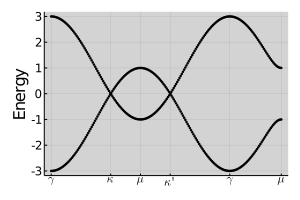

In [91]:
plot(bands; size=(300,200))

### Shorter version with pre-defined operators

In [57]:
T = Hops() # empty hops
Operators.nearestneighbor!(T, lat) # fill in nearest neighbors
Operators.addchemicalpotential!(T, lat, r->(r[4]==0) ? 0.3 : -0.3) # sublattice imbalance

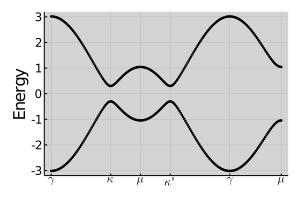

In [58]:
ks = kpath(lat; num_points=200)
bands = getbands(T, ks)

plot(bands; size=(300,200))

Calculating expectation values:

In [19]:
T = Hops() # empty hops
Operators.nearestneighbor!(T, lat) # fill in nearest neighbors
Operators.addchemicalpotential!(T, lat, r->(r[4]==0) ? 0.3 : -0.3) # sublattice imbalance

T = TightBinding.addspin(T, :spinhalf)
Operators.addzeeman!(T, lat, 0.2)

# Additional operators
sz = Operators.spin(lat, "sz")
valley = Operators.valleyoperator(lat; spinhalf=true)

Dict{Array{Int64,1},AbstractArray{T,2} where T} with 7 entries:
  [0, -1] => …
  [-1, 0] => …
  [0, 0]  => 4×4 SparseMatrixCSC{Complex{Float64},Int64} with 0 stored entries
  [1, 0]  => …
  [1, -1] => …
  [0, 1]  => …
  [-1, 1] => …

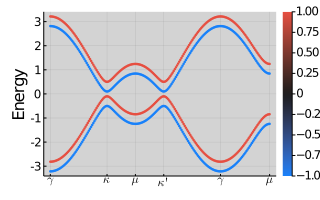

┌ Warning: Multiple series with different color share a colorbar. Colorbar may not reflect all series correctly.
└ @ Plots /home/wolft/.julia/packages/Plots/ninUP/src/backends/gr.jl:491


In [20]:
ks = kpath(lat; num_points=200)
bands = getbands(T, ks, [sz, valley])

plot(bands; size=(320,200), colorbar=true)

## Ribbons

### Armchair

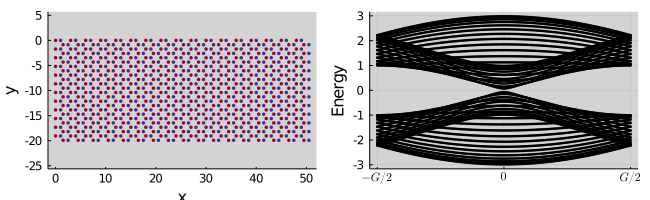

In [80]:
N = 12
lat = Structure.reduceto1D(Geometries2D.honeycomb(), [[1, 1] [N, -N]])
p1 = plot(lat, "sublattice"; supercell=[16], markersize=2)

hops = Operators.graphene(lat)

ks = kpath(lat; num_points=200)
bands = getbands(hops, ks)

p2 = plot(bands; size=(320,200), colorbar=true)

plot(p1,p2, size=(650,200))

### Zigzag 

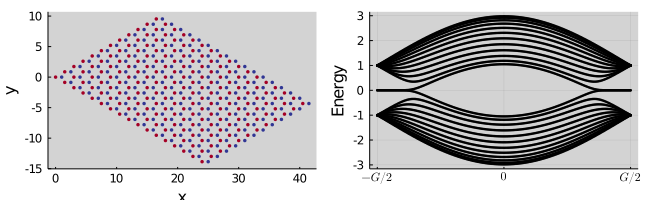

In [81]:
N = 12
lat = Structure.reduceto1D(Geometries2D.honeycomb(), [[1, 0] [0, N]])
p1 = plot(lat, "sublattice"; supercell=[16], markersize=2)

hops = Operators.graphene(lat)

ks = kpath(lat; num_points=200)
bands = getbands(hops, ks)

p2 = plot(bands; size=(320,200), colorbar=true)

plot(p1,p2, size=(650,200))